In [ ]:
from google.colab import files
files.upload()

Saving Medical Cost Personal Datasets.zip to Medical Cost Personal Datasets (2).zip


{'Medical Cost Personal Datasets (2).zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00pi;Y\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x00\x00Medical Cost Personal Datasets/Medical Cost Personal Datasets/PK\x03\x04\x14\x00\x00\x00\x08\x00pi;Y\xe7d\xc0\x82\xb1?\x00\x00L\xd9\x00\x00K\x00\x00\x00Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv\x85}\xdb\xae-\xbb\x8d\xdd\xbb\x81\xf5\'\x1b\x05\x89\xa2n\x9f\xe3$;n#\xdd6\xe0\xd3A\x92\xbf\x0f\x07\xa5*Q\xa2\xdc\xf6\xe3q\xedZ\xb3$^\x06\xc9A\xf2\xcf\x7f\xf9\xfd\xeb\x8f\xdf\xff\xf7\xd7\x7f\xfb\x8f\xbf\xfe\xfa\xef\xff\xf6\xd7\x7f\xff\x1f\xff\xf8\xfd\xb7_\x7f\xfc\xc7\xdf\xff\xd7\xef\x7f\xfc\xfa\xc7\xef\xbf\xfc\xf5\xef\x7f\x93\xff\xfc\xe7\x7f\xfc\xe5\xf7\x1f?\x7f\x8a\xfd\xd7\xff\xfc\xfd\x1f\x7f\xfe\xf7\xdf\xbf\xa8>\xfdW\xf8\xf5\xff~\xff\xf1\xeb\x8f\xbf\xff\xef\xff\xfc\xb7\xff\xf3\xfb\x8f\xff\xfc\x15Kk\xfctby\xb2\xfd\xd2\xe7Rzj\xfd\x15\x7f\xfd\xed\xef\xe3\xb9\xdf\x7f\xc6s\x95\xf2\x933\xa5\x9f?\xd1\xf7\xdc\xaf\xb4?\xc4\xcc\x

In [ ]:
!unzip "Medical Cost Personal Datasets.zip" -d data/

Archive:  Medical Cost Personal Datasets.zip
   creating: data/Medical Cost Personal Datasets/Medical Cost Personal Datasets/
  inflating: data/Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv  


In [ ]:
import numpy as np
import pandas as pd
import io

import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

In [ ]:
#importing the dataframe and making copy to manipulate.
df = pd.read_csv('data/Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv')
df_copy = df.copy()

# Display the first few rows
print(df.head())
print(df.info())
print(df.describe(include='all'))
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.00000

In [ ]:
#by age distrobution
# sns.histplot(df['age'], kde=True)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.show()

- The dataset is not perfectly uniform there is a spike in the younger ages, then a decline and slight rise toward older ages.
- It could imply that more young people are buying insurance, or that they’re overrepresented in this sample.
- If age is a factor in predicting costs, this shape matters a lot—it could skew average charges, influence regression modeling, or affect insights like risk by age


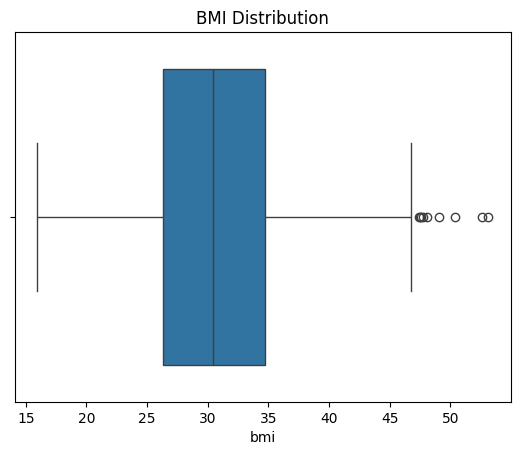

In [34]:
#bmi boxplot
sns.boxplot(x=df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [35]:
plt.savefig("bmi_box.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [36]:
from google.colab import files
files.download("bmi_box.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Most BMIs hover around the middle range—somewhere between the mid-20s to low-30s.
- There are several individuals with BMI above 40 or even 50, which are flagged as outliers. That could suggest obesity-related trends in insurance costs.



In [ ]:
# Charges histogram
# sns.histplot(df['charges'], bins=50, kde=True)
# plt.title('Insurance Charges')
# plt.xlabel('Charges')
# plt.ylabel('Count')
# plt.show()

- Most insurance charges fall between 0 and 20,000 dollars, with the highest concentration in the 0 to 10,000 dollar bracket.
- Beyond 20,000 dollars, the number of individuals gradually decreases—but there are still people paying significantly more, even reaching close to 60,000 dollars.
- The smooth curve (KDE line) helps visualize the shape of the distribution. It confirms that the data is right-skewed—meaning a smaller group pays much higher premiums compared to the majority.



In [ ]:
# Categorical count plots
# sns.countplot(x='sex', data=df)
# plt.title('Sex Distribution')
# plt.show()

# sns.countplot(x='smoker', data=df)
# plt.title('Smoker Distribution')
# plt.show()

# sns.countplot(x='region', data=df)
# plt.title('Region Distribution')
# plt.show()

- the dataset doesn’t lean toward one sex over the other, which is great for reducing gender bias in analysis and modeling.
- About 75–80% of this dataset consists of non-smokers, while only ~20–25% are smokers.
- That imbalance is critical for analysis because smoking is often linked to higher insurance charges.
- This uneven split means smoking status could have strong predictive power.
- Southeast has the highest count—just over 350 people.
- Southwest follows closely with slightly more than 300.
- Northwest and Northeast each have just under 300 individuals.



In [ ]:
# 2 feature comparisons.
# Charges vs smoker
# sns.boxplot(x='smoker', y='charges', data=df)
# plt.title('Charges by Smoking Status')
# plt.show()

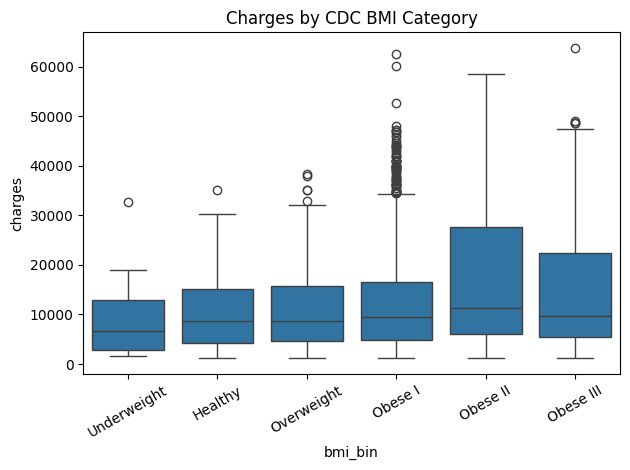

In [37]:
# Create BMI category
df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 40, df['bmi'].max()],
                       labels=['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

sns.boxplot(x='bmi_bin', y='charges', data=df)
plt.title('Charges by CDC BMI Category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


- Obese group:
  - Has the highest median charges—meaning half of the individuals in this category pay more than those in any other group.
  - Displays a wide spread of charges, with several visible outliers extending toward the higher end (some nearing 60,000 dollars).
- Normal and Overweight groups:
  - Have slightly lower medians, and their charge distributions are more compact—fewer extremes and smaller interquartile ranges.
- Underweight group:
  - The lowest representation and relatively modest charges.
  - Also has a few outliers, though far fewer than the Obese category.


In [ ]:
print("\nCharges by smoker group:")
print(df.groupby('smoker')['charges'].describe())

In [ ]:
print("\nMean charges by region:")
print(df.groupby('region')['charges'].mean())

In [ ]:
# sns.barplot(x='children', y='charges', data=df)
# plt.title('Charges vs. Number of Children')
# plt.show()

# Preprocessing Data

In [ ]:
df_copy.isnull().sum()       # Check for missing values
df_copy.duplicated().sum()   # Check for duplicate rows

In [ ]:
df_copy[df_copy.duplicated()]

In [ ]:
df_copy = df_copy.drop_duplicates()


In [ ]:
# Encode 'smoker' column as binary
df_copy['smoker'] = df_copy['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
# One-hot encode 'sex' and 'region'
df_copy = pd.get_dummies(df_copy, columns=['sex', 'region'], drop_first=True)

In [ ]:
# Feature Engineering
# BMI categories (CDC-aligned)
df_copy['BMI Category'] = pd.cut(df_copy['bmi'],
                                 bins=[0, 18.5, 25, 30, 35, 40, df_copy['bmi'].max()],
                                 labels=['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'ObeseIII'])

In [ ]:
# Has Children
df_copy['Has Children'] = df_copy['children'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [ ]:
# Age–Smoker category
df_copy['Age Smoker Group'] = df_copy.apply(
    lambda row: 'Young Smoker' if row['age'] < 25 and row['smoker'] == 1
    else 'Mid-Aged Smoker' if 25 <= row['age'] <= 40 and row['smoker'] == 1
    else 'Non-Smoker',
    axis=1)

In [ ]:
# One-hot encode new engineered categorical features
df_copy = pd.get_dummies(df_copy,
                         columns=['BMI Category', 'Has Children', 'Age Smoker Group'],
                         drop_first=True)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children', 'charges']
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

# Correlation matrix

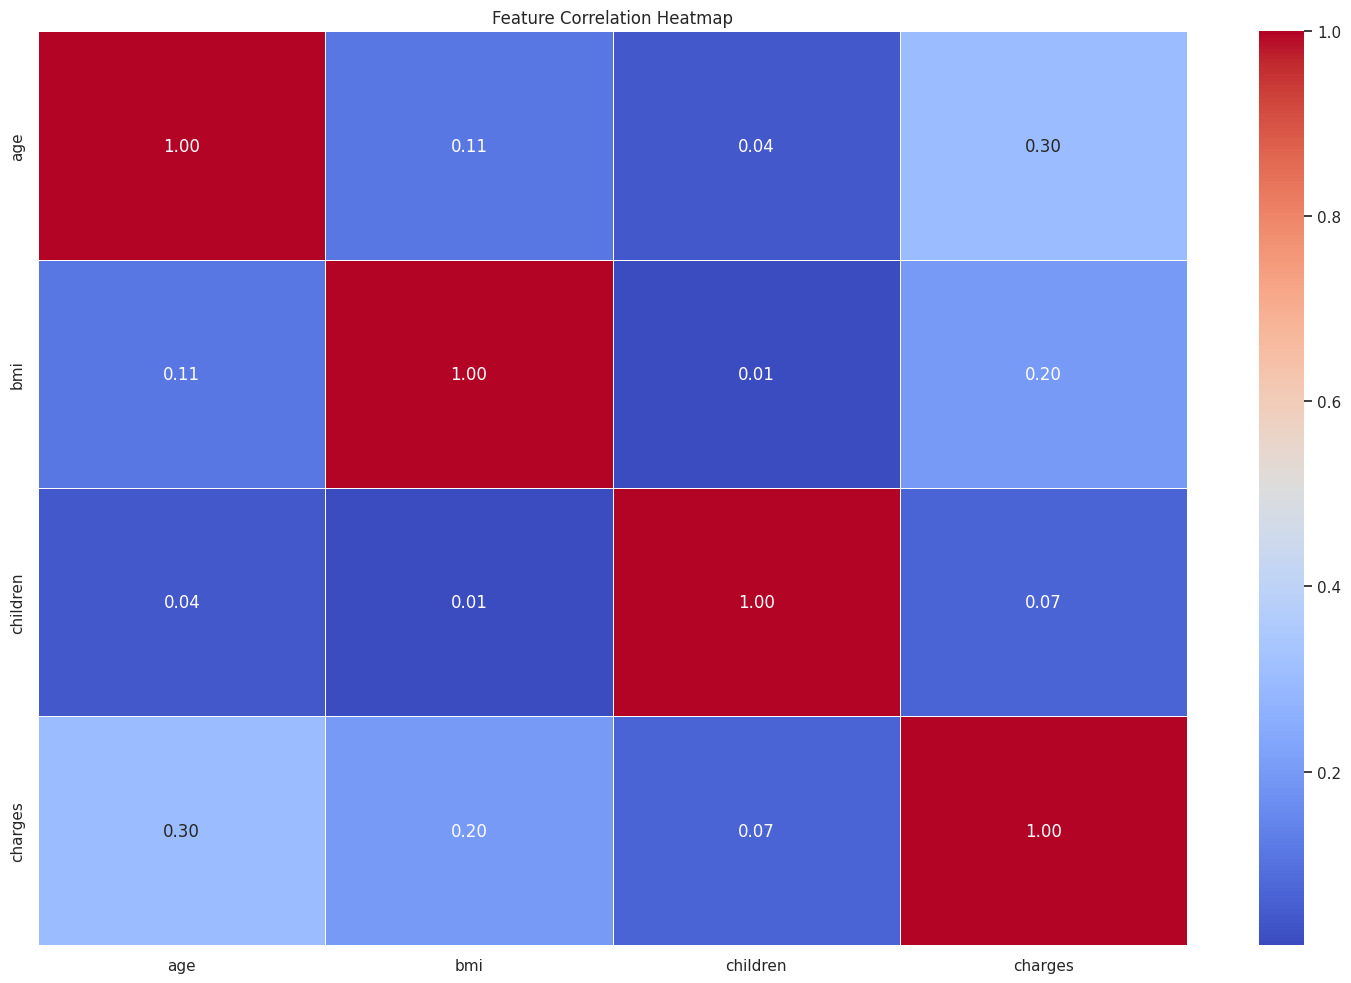

In [38]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

# Compute correlation matrix
corr_matrix = df_copy.corr(numeric_only=True)

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


- Smoker vs. Charges: Very strong positive correlation. This confirms what previous plots revealed—smokers rack up higher costs.
- BMI-related bins (especially Obese I, II, III): Correlate positively with charges, aligning with trends around obesity and medical expenses.
- Age and Charges: Moderate positive link—older individuals tend to pay more.
- Region and Sex Encodings: Mostly low correlation, suggesting these aren’t major cost drivers on their own.
- Has Children & Children Count: Expected positive relationship, but not highly tied to charges.


# Regional Analysis: Medical Insurance Costs

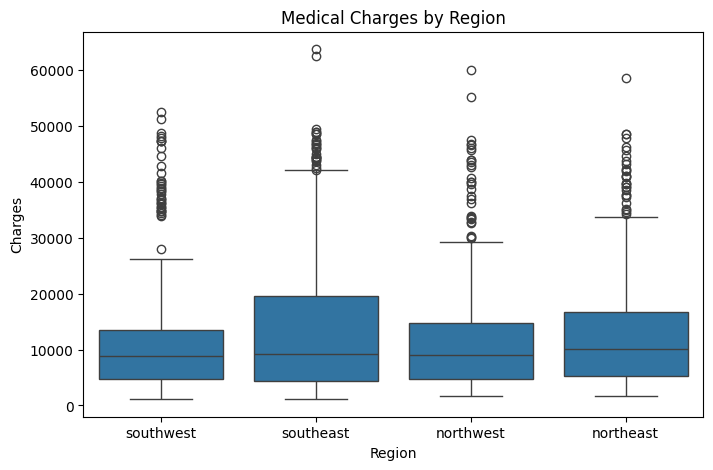

In [ ]:
# Medical charges by region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df_copy)
plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()



*  Median Comparison: The Northeast region exhibits the highest median medical charges.

* Skewness & Outliers: The Southeast region displays the most positively skewed distribution, indicating a concentration of lower charges with a few extremely high outliers.

* Distribution Spread: The Southwest region shows the narrowest range and shortest tails, implying more consistent and less variable charges across the dataset.



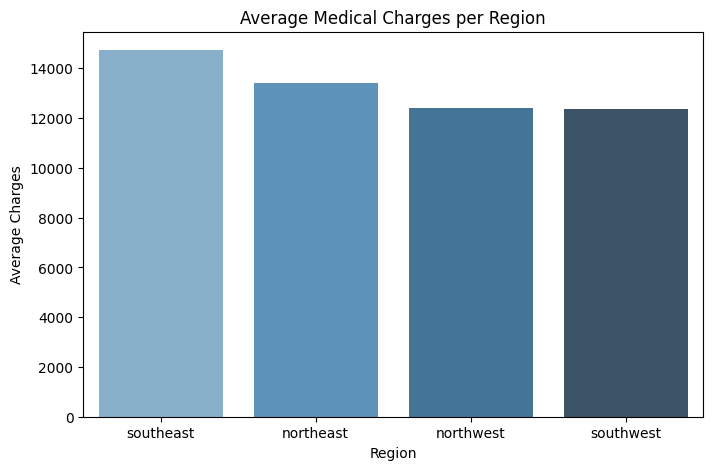

In [ ]:
#Average Charges per Region

region_avg = df.groupby('region')['charges'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_avg.index, y=region_avg.values, palette='Blues_d')
plt.title('Average Medical Charges per Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()




* It's clear in the bar chart the Southeast region has the highest average charges, while the Southwest has the lowest.
* The comparison suggests regional differences in healthcare implications or risk factors.



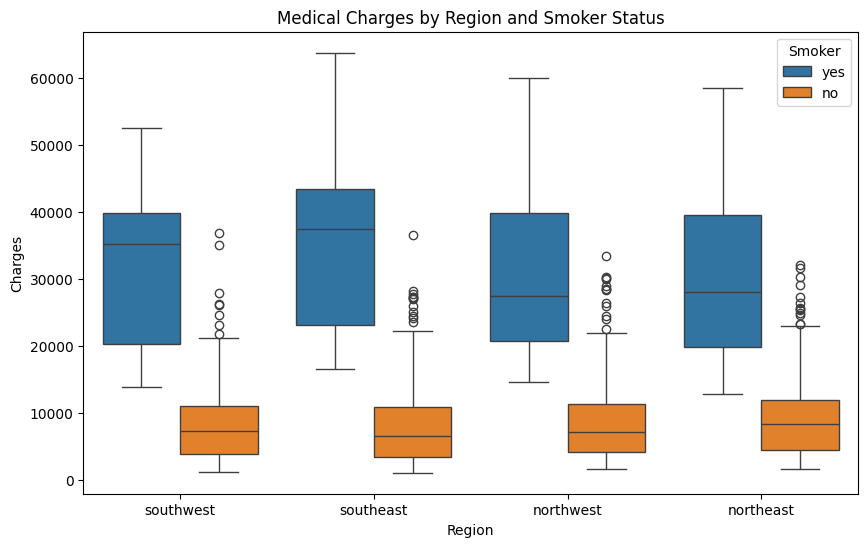

In [ ]:
# Smoker Impact by Region

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', hue='smoker', data=df_copy)
plt.title('Medical Charges by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

* Charges Incurred by Smokers: Across all regions, smokers have significantly higher charges than non-smokers.

* High Concentration Regions: As the region with the highest average charges, the gap appears most pronounced in the Southeast, indicating a strong regional impact of smoking on medical costs.

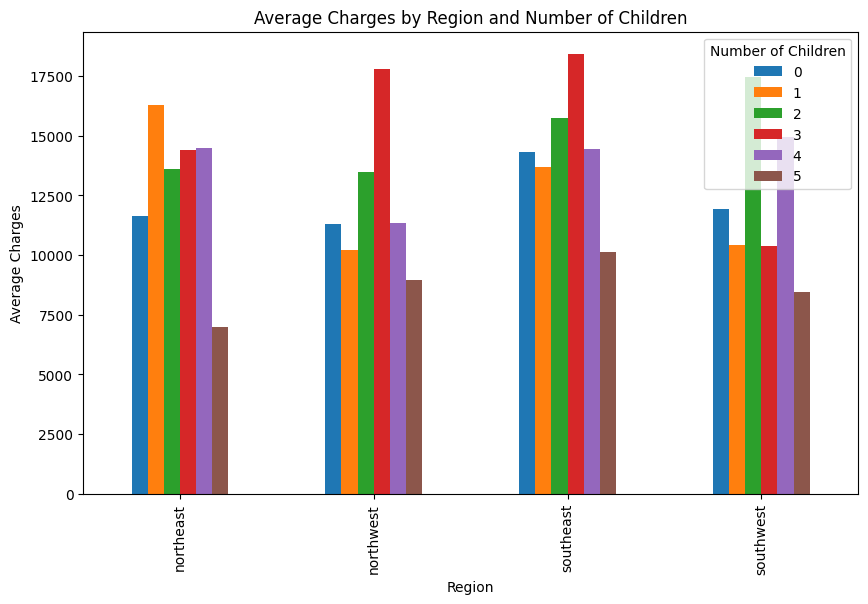

In [ ]:
# Region + Children

df_copy.groupby(['region', 'children'])['charges'].mean().unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Charges by Region and Number of Children')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.legend(title='Number of Children')
plt.show()

*   Number of Children Implication on Charges: Seems to be no consistent increase of charges as the number of children increases, although individuals with 5 children incur the least amount of charges.
*   Average Charges: It was determined the Southwest region had the lowest average charges, however, individuals with 2 or 4 children experience significantly higher costs than those with 0, 1, 3, or 5.



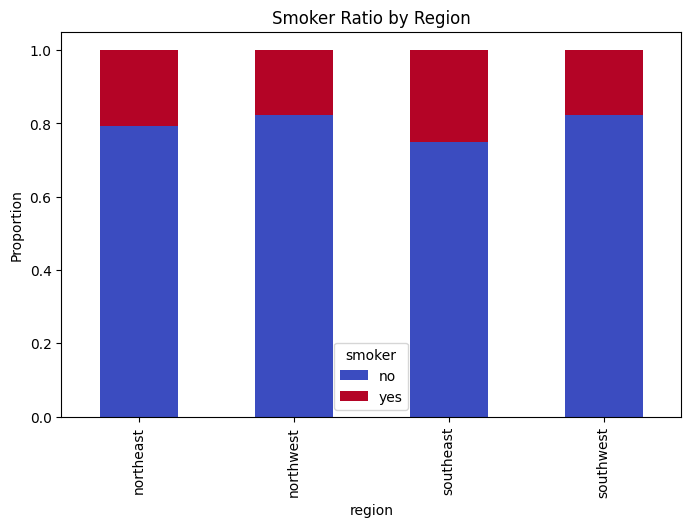

In [ ]:
# Smoker Ratio per Region

smoker_ratio = df_copy.groupby('region')['smoker'].value_counts(normalize=True).unstack()
smoker_ratio.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Smoker Ratio by Region')
plt.ylabel('Proportion')
plt.show()

In [ ]:
# Top 5 Most Expensive Individuals per Region

top5_per_region = df.groupby('region').apply(lambda x: x.nlargest(5, 'charges'))[['age', 'charges', 'smoker']]
top5_per_region

age      charges smoker
region                                 
northeast 577    31  58571.07448    yes
          281    54  48549.17835    yes
          330    61  48517.56315    yes
          288    59  47896.79135    yes
          883    51  46255.11250    yes
northwest 1230   52  60021.39897    yes
          819    33  55135.40209    yes
          55     58  47496.49445    yes
          1301   62  46718.16325    yes
          1122   53  46661.44240    yes
southeast 543    54  63770.42801    yes
          1300   45  62592.87309    yes
          1241   64  49577.66240    yes
          1062   59  48970.24760    yes
          488    44  48885.13561    yes
southwest 1146   60  52590.82939    yes
          34     28  51194.55914    yes
          175    63  48824.45000    yes
          39     60  48173.36100    yes
          328    64  47928.03000    yes

* Most Expensive Invdividuals vs Smokers: Across all regions, the top 5 most expensive individuals are all smokers.
* Most Expensive Invdividuals vs Age: Insurance charges do not appear to be closely tied to age, given the broad age distribution within this group.

In [39]:
# Average charges by smoker status
avg_charges_smoker = df.groupby('smoker')['charges'].mean()
print(avg_charges_smoker)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


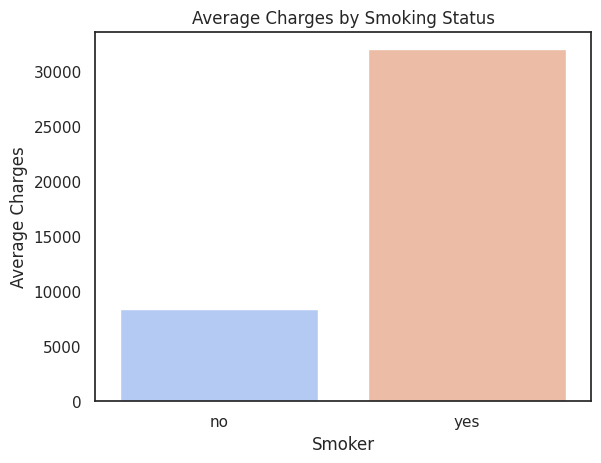

In [40]:
sns.barplot(x=avg_charges_smoker.index, y=avg_charges_smoker.values, palette='coolwarm')
plt.title('Average Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()